In [178]:
%matplotlib inline
import numpy as np
np.random.seed(2017)
import matplotlib.pyplot as plt
import pickle
from sklearn import datasets
#from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [179]:
class SVM():
    def __init__(self,gamma=1,iterations=1000,lr=0.01,p=2):
        self.gamma=1
        self.iterations=iterations
        self.lr=lr
        self.w=None
        self.b=0
        self.p=p
    def quad_kernal(self,X1,X2):
        ans=pow(self.p,np.dot(X1,X2))
        return ans
    
    def K_matrix(self,X,X1):
        m,n=X.shape
        i,j=X1.shape
        K=np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                K[i,j]=self.quad_kernal(X[i],X1[j])
        return K
                
    def fit(self,X,y):
        m,n=X.shape
        K=self.K_matrix(X,X)
        self.w=np.zeros(n)
        for iter in range(self.iterations):
            for i,j in enumerate(K):
                print(K.shape)
                print(self.w.shape)
                condition=y[i]*(np.dot(K[i,:],self.w)-self.b)>=1
                if condition:
                    self.w=self.w-self.lr*(2*self.gamma*self.w)
                else:
                    self.w=self.w-self.lr*(2*self.gamma*self.w-(np.dot(K[i,:],y[i])))
                    self.b= self.b- self.lr*(y[i])
    def predict(self,X,X1):
        K=self.K_matrix(X,X1)
        output= np.dot(K,self.w) -self.b
        return np.sign(output)   
        

(100, 2)


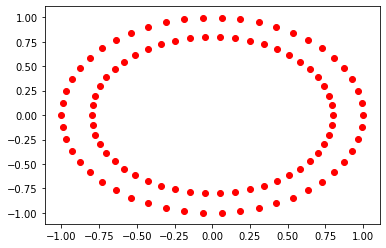

In [188]:
X_train, y = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)
plt.scatter(X_train[:,0],X_train[:,1],c='red')
print(X_train.shape)

In [ ]:
Make SVM with kernel using such data

In [ ]:
inn=open("test_data.pickle","rb")
test_data=pickle.load(inn)
inn=open("train_data.pickle","rb")
train_data=pickle.load(inn)
inn=open("test_labels.pickle","rb")
test_labels=pickle.load(inn)
inn=open("train_labels.pickle","rb")
train_labels=pickle.load(inn)

for i in range(np.size(train_data,axis=0)):
    train_data[i,:,:]=np.fft.ifft(train_data[i,:,:])

for i in range(np.size(test_data,axis=0)):
    test_data[i,:,:]=np.fft.ifft(test_data[i,:,:])
    

test_data=np.abs(test_data[:,5:40,:])
train_data=np.abs(train_data[:,5:40,:])
train_data=train_data/(np.max(train_data))
test_data=test_data/(np.max(test_data))



train_data = np.reshape(train_data, [np.size(train_data, axis=0),np.size(train_data,axis=1) * np.size(train_data,axis=2)])
test_data = np.reshape(test_data, [np.size(test_data, axis=0), np.size(test_data,axis=1)*np.size(test_data,axis=2)])

X, y =shuffle(train_data, train_labels)
X_test, y_test =shuffle(test_data, test_labels)
